Two main types of Machine Learning

*Supervised*: the machine already knows what the correct output should look like, they already know that there is a relationship between the input and output variable.

- classification: process of finding a model that separates input data into multiple discrete classes or labels [true or false, male or female]

- regression: process of finding a model that predicts a continuous value based on its input variables


*Unsupervised*: the machine doesn't know what the correct output is, allowing us to approach problems with little to no idea what results should look like

- clustering: grouping objects into clusters


## Linear Regression Implementation in Python

Regression predicts continuous values like temperature, price, salary, etc.

Linear regression is mainly used for finding a linear relationship between the target and one or more predictors by fitting the best linear relationship between the dependent (target) and independent variables (predictors)


### Assumptions:
Predictor variables should be linearly related to the dependent variables.

The data should be normally distributed

There should be little or no multicollinearity present in the data

The mean of the residual (difference between actual and predicted value) is 0.


### Simple linear regression
- helps us find linear relationship between 2 continuous variables

Equation: Y = β0 + β1X + e
Y = dependent variable/target variable
β0 = intercept of the regression line
β1 = slope of the regression line 
X = independent variable/predictor variable
e = error


### Implementation using Python
**Problem statement** : Build a simple linear regression model to predict sales based on the money spent on TV for advertising.

In [13]:
# importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# reading the dataset
ad = pd.read_csv("advertising.csv")

ad.head()


# Since our problem only needs Sales and TV, we do not need radio
# and newspaper columns. 
ad.drop(columns=['Radio','Newspaper'], inplace = True)

ad.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [12]:
# Equation: Sales = β0 + β1*TV + e

# Setting the values for independent (X) and dependent variable (Y)

x = ad[['TV']]
y = ad[['Sales']]


# Splitting the dataset into train and test set 

# train_test_split = splits data arrays into two subsets: training and testing

# test_size = specifies the size of test data, default is 0.25

# random_state = controls shuffling applies to data before applying split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [16]:
# Implementing the linear model

# fitting the linear regression model 

# to build a linear regression model, you need an instance of LinearRegression()
# class and use x_train, y_train to train the model using the fit() method
# of that class
slr = LinearRegression()
slr.fit(x_train,y_train)


# Model Equation

# Intercept and coefficient
print('Intercept: ', slr.intercept_)
print('Coefficient: ', slr.coef_)

Intercept:  [6.9486832]
Coefficient:  [[0.05454575]]


Regression equation: Sales = 6.948 + 0.054 * TV

Interpretation: If we keep the money spent on TV for advertisement as 0, the estimated average sales will be 6.948 and a single unit increase in money spent on TV for advertisement increases sales by 0.054. 

In [21]:
# Prediction on the test set

# prediction on test set
y_pred_slr = slr.predict(x_test)

# Predicted values
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [[ 7.37414007]
 [19.94148154]
 [14.32326899]
 [18.82329361]
 [20.13239168]
 [18.2287449 ]
 [14.54145201]
 [17.72692398]
 [18.75238413]
 [18.77420243]
 [13.34144544]
 [19.46693349]
 [10.01415451]
 [17.1923756 ]
 [11.70507285]
 [12.08689312]
 [15.11418241]
 [16.23237035]
 [15.8669138 ]
 [13.1068987 ]
 [18.65965635]
 [14.00690363]
 [17.60692332]
 [16.60328147]
 [17.03419291]
 [18.96511257]
 [18.93783969]
 [11.05597839]
 [17.03419291]
 [13.66326538]
 [10.6796127 ]
 [10.71234015]
 [13.5487193 ]
 [17.22510305]
 [ 9.67597085]
 [13.52144643]
 [12.25053038]
 [16.13418799]
 [19.07965865]
 [17.48692266]
 [18.69783838]
 [16.53237199]
 [15.92145955]
 [18.86693021]
 [13.5050827 ]
 [11.84143724]
 [ 7.87050642]
 [20.51966653]
 [10.79961336]
 [ 9.03233096]
 [17.99419817]
 [16.29237067]
 [11.04506924]
 [14.09963141]
 [18.44147334]
 [ 9.3759692 ]
 [ 7.88687015]
 [ 8.34505447]
 [17.72692398]
 [11.62325422]]


ValueError: Per-column arrays must each be 1-dimensional

In [28]:
# Actual value and predicted value

# using np.squeeze to assure that arrays are one dimension
y_test = np.squeeze(y_test)
y_pred_slr = np.squeeze(y_pred_slr)

slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff.head()

,Actual value,Predicted value
126,6.6,7.374140
104,20.7,19.941482
99,17.2,14.323269
92,19.4,18.823294
111,21.8,20.132392


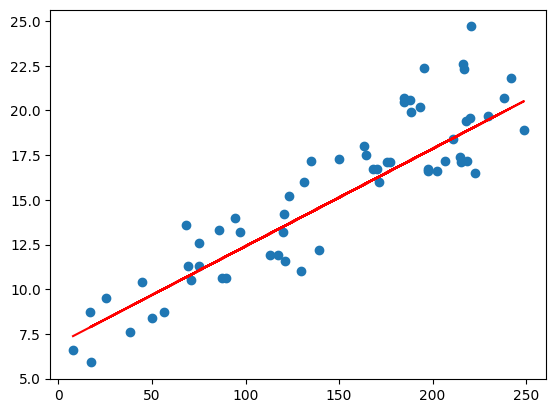

In [29]:
# Line of best fit

plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_slr,'Red') # generates line graph between x and pred outcome
plt.show()

In [32]:
# Model evaluation

from sklearn import metrics

mean_ab_error = metrics.mean_absolute_error(y_test, y_pred_slr)
mean_sq_error = metrics.mean_squared_error(y_test, y_pred_slr)
root_mean_sq_err = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))


# score method computes R^2 ; x and y are input features to evaluate performance
# '{:.2f} formatted as a floating-point number 
print('R squared: {:.2f}'.format(slr.score(x,y)*100))


# Absolute difference between actual/true and predicted values, lower = better
print('Mean Absolute Error:', mean_ab_error)

print('Mean Square Error:', mean_sq_error)

# RMSE = SD of the errors which occur when a prediction is made on a dataset 
# root is considered while determining the accuracy of the model
print('Root Mean Square Error:',root_mean_sq_err)

R squared: 81.10
Mean Absolute Error: 1.6480589869746525
Mean Square Error: 4.077556371826948
Root Mean Square Error: 2.019296008966231
